In [0]:
import os; os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/Unsupervised Learning')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from util import getKaggleMNIST
import os
import sys
from sklearn.mixture import GaussianMixture

In [0]:
def purity(Y, R):
    # maximum purity is 1, higher is better
    N, K = R.shape
    p = 0
    for k in range(K):
        best_target = -1 # we don't strictly need to store this
        max_intersection = 0
        for j in range(K):
            intersection = R[Y==j, k].sum()
            if intersection > max_intersection:
                max_intersection = intersection
                best_target = j
        p += max_intersection
    return p / N

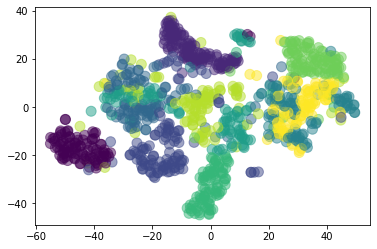

Rfull.shape: (1000, 10)
Full purity: 0.556
reduced purity: 0.7179802694241184


In [10]:
def main():
    Xtrain, Ytrain, _, _ = getKaggleMNIST()
    sample_size = 1000
    X = Xtrain[:sample_size]
    Y = Ytrain[:sample_size]

    tsne = TSNE()
    Z = tsne.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
    plt.show()

    # purity measure from unsupervised machine learning pt 1
    # maximum purity is 1, higher is better

    gmm = GaussianMixture(n_components=10)
    gmm.fit(X)
    Rfull = gmm.predict_proba(X)
    print("Rfull.shape:", Rfull.shape)
    print("Full purity:", purity(Y, Rfull))

    #now try the same thing on the reduced data
    gmm.fit(Z)
    Rreduced = gmm.predict_proba(Z)
    print("reduced purity:", purity(Y, Rreduced))

if __name__=='__main__':
    main()
